<center><img src="logo.png"></center>

In [1]:
# import pandas, pd is an alias
import pandas as pd

# import numpy, np is an alias
import numpy as np

# import matplotlib.pyplot, plt is an alias
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

#Sklearn for clustering
import sklearn

#import train test split
from sklearn.model_selection import train_test_split


#importing Standard Scalar
from sklearn.preprocessing import StandardScaler


#Kmean Clustering
from sklearn.cluster import KMeans


#Hierarchical Clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree


#importing PCA Clustering
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

#Applying Logistical regression on the data on our PCA
from sklearn.linear_model import LogisticRegression

#Metrics
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.metrics import silhouette_score


#import warnings
#warnings.filterwarnings('ignore')

> # <font color=blue> 1. Data Sourcing </font>

> ## 1.1. Enter CSV Data File location

In [2]:
# Store file location
Location = "./"

#Store Datafile name in CSV File format
FileName = "Country-data.csv"

LocationCountry = Location + FileName
print("File '{0}' available in location '{1}' will be used as Data File".format(FileName,LocationCountry))

File 'Country-data.csv' available in location './Country-data.csv' will be used as Data File


> ## 1.2. Read CSV Data File

In [3]:
# Read Data File in CSV File Format
dfCountry = pd.read_csv(LocationCountry, sep=',', encoding='utf-8')
dfCountry.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


> ## 1.3. Inspecting the DataFrame

In [4]:
dfCountry.shape

(167, 10)

In [5]:
dfCountry.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [6]:
dfCountry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


> ## 1.4. DataSet Metadata prepration

In [7]:
# research each columns in dataframe datatype

print("-" * 95)
print("| Column Name".ljust(13), '|', "Data Type",'\t', '|', "Null",'|', "Unique",'|', 
      "Sample Unique Records                      |")
print("-" * 95)

for col in dfCountry.columns:
    print('|',col.ljust(11), '|', dfCountry[col].dtypes," ",'\t','|', dfCountry[col].isnull().sum(),'\t''|', 
          dfCountry[col].nunique(),'   |', dfCountry[col].unique()[0:4] )
    

-----------------------------------------------------------------------------------------------
| Column Name | Data Type 	 | Null | Unique | Sample Unique Records                      |
-----------------------------------------------------------------------------------------------
| country     | object   	 | 0 	| 167    | ['Afghanistan' 'Albania' 'Algeria' 'Angola']
| child_mort  | float64   	 | 0 	| 139    | [ 90.2  16.6  27.3 119. ]
| exports     | float64   	 | 0 	| 147    | [10.  28.  38.4 62.3]
| health      | float64   	 | 0 	| 147    | [7.58 6.55 4.17 2.85]
| imports     | float64   	 | 0 	| 151    | [44.9 48.6 31.4 42.9]
| income      | int64   	 | 0 	| 156    | [ 1610  9930 12900  5900]
| inflation   | float64   	 | 0 	| 156    | [ 9.44  4.49 16.1  22.4 ]
| life_expec  | float64   	 | 0 	| 127    | [56.2 76.3 76.5 60.1]
| total_fer   | float64   	 | 0 	| 138    | [5.82 1.65 2.89 6.16]
| gdpp        | int64   	 | 0 	| 157    | [ 553 4090 4460 3530]


> # <font color=blue> 2. Data Cleaning </font>

> ## 2.1 Fixing Rows and Columns

> #### The data file contains 167 Rows and 10 columns. 
> - No null values on each columns Treating missing values or nulls not required
> - One Description column is available Data cleanup, column split or datatype conversion not required

> #### Convert % columns Exports, Health, imports into Numbers

In [8]:
#converting % columns into Number

dfCountry['exports'] = dfCountry['exports'] * dfCountry['gdpp'] / 100
dfCountry['health'] = dfCountry['health'] * dfCountry['gdpp'] / 100
dfCountry['imports'] = dfCountry['imports'] * dfCountry['gdpp'] / 100
dfCountry.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


> ## 2.2. Univariate Analysis

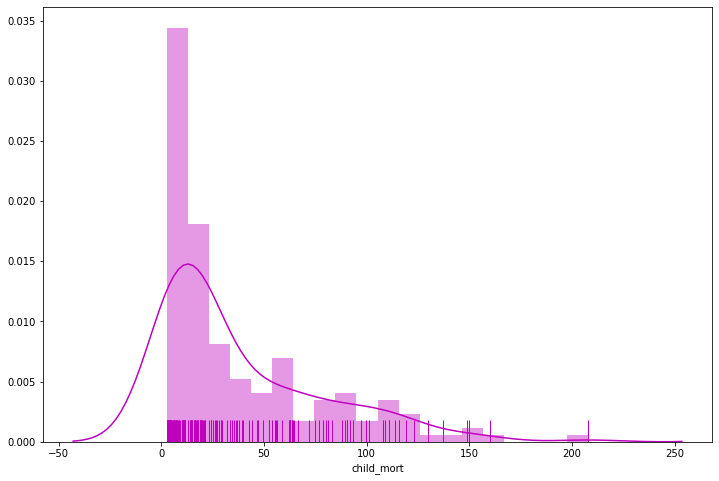

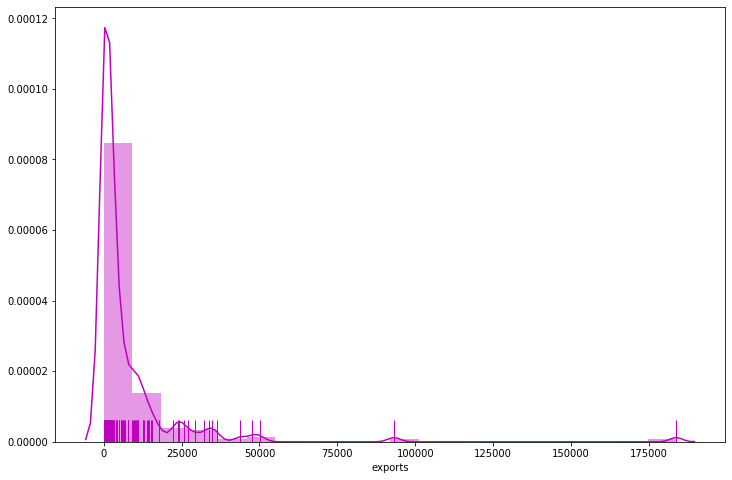

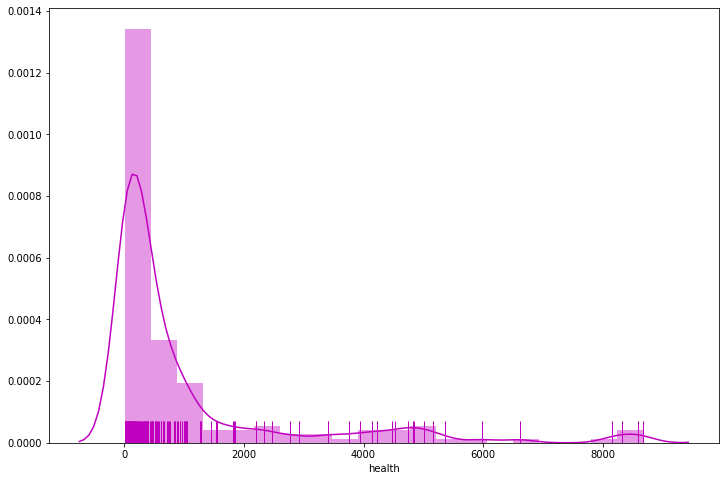

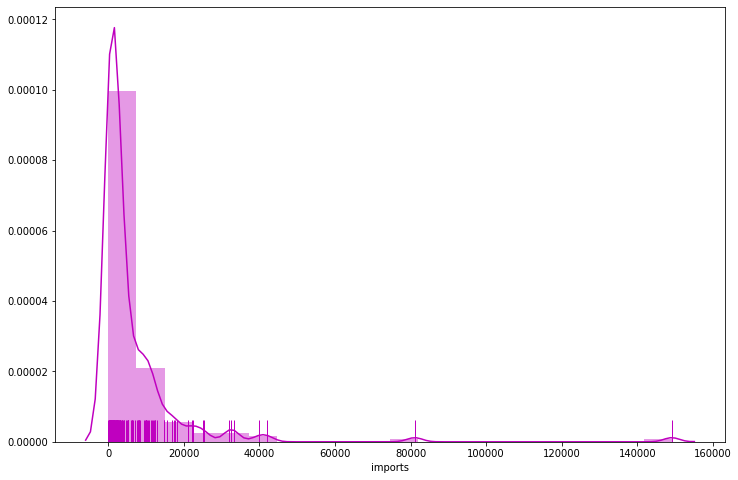

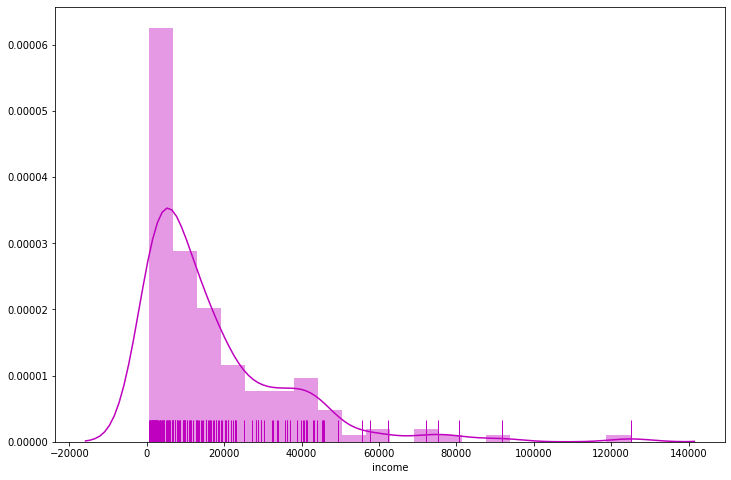

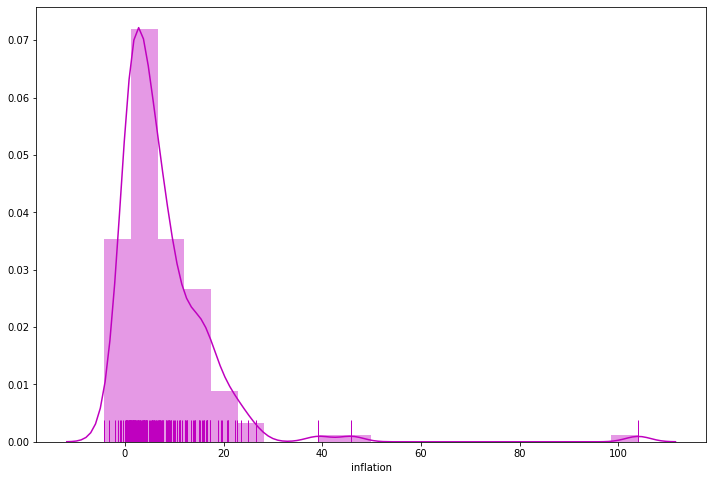

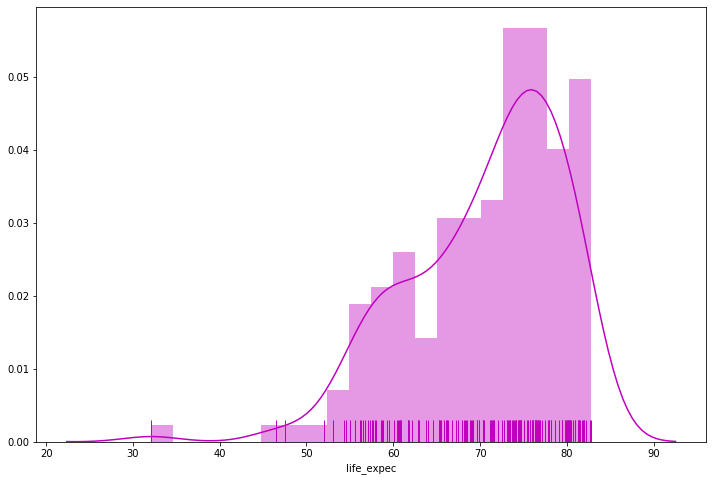

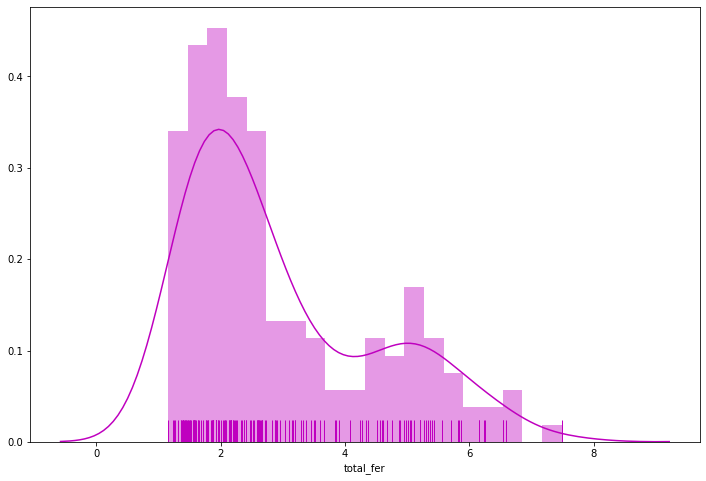

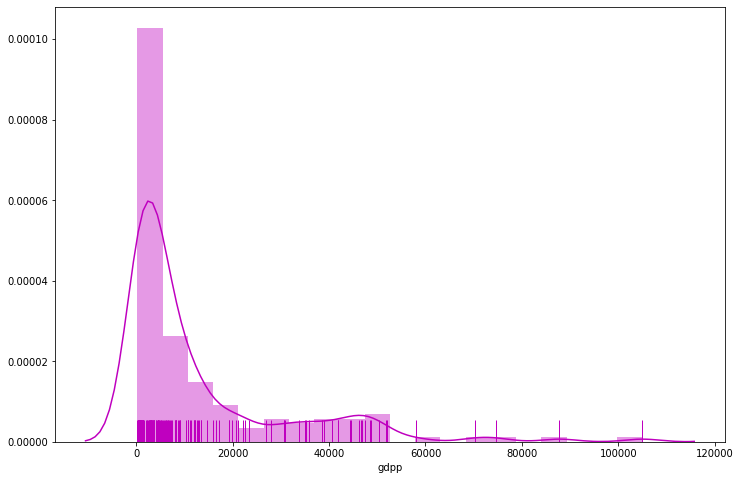

In [9]:
#Creating list of cols required Bins
bincols = ["child_mort","exports","health","imports","income","inflation","life_expec","total_fer","gdpp"]


for cols in bincols:
    plt.subplots(figsize=(12,8), sharex=True)
    sns.distplot(dfCountry[cols], color='m', kde=True, rug=True, bins=20)
    plt.show()


> ## 2.4 Bivariate Analysis

In [10]:
#bivatiate Corelation
dfCountry.corr()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.297230,-0.430438,-0.319138,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.297230,1.000000,0.612919,0.987686,0.725351,-0.141553,0.377694,-0.291096,0.768894
health,-0.430438,0.612919,1.000000,0.638581,0.690857,-0.253956,0.545626,-0.407984,0.916593
imports,-0.319138,0.987686,0.638581,1.000000,0.672056,-0.179458,0.397515,-0.317061,0.755114
income,-0.524315,0.725351,0.690857,0.672056,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.141553,-0.253956,-0.179458,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.377694,0.545626,0.397515,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.291096,-0.407984,-0.317061,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.768894,0.916593,0.755114,0.895571,-0.221631,0.600089,-0.454910,1.000000


<function matplotlib.pyplot.show(*args, **kw)>

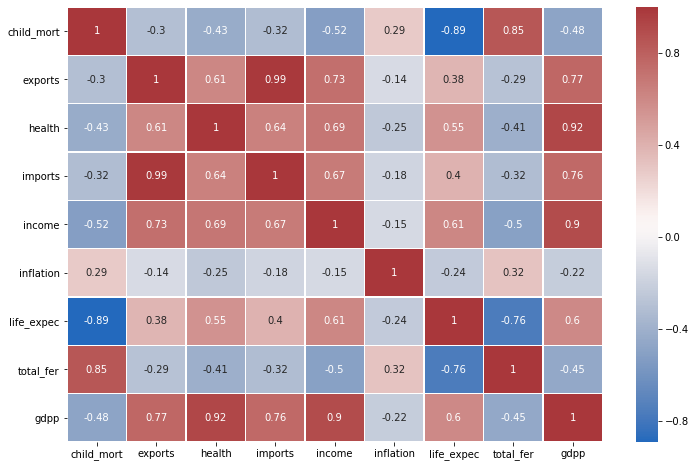

In [11]:
#Bivariate boxplot

plt.subplots(figsize=(12,8), sharex=True)
sns.heatmap(round(dfCountry.corr(),2), cmap="vlag", annot=True, linewidths=.5)
plt.show

> # <font color=blue> 3. Modeling </font>

> ## 3.1 Scaling

In [12]:
# Putting response variable to y
y = dfCountry[["country"]]
y.head()

,country
0,Afghanistan
1,Albania
2,Algeria
3,Angola
4,Antigua and Barbuda


In [13]:
# Putting feature variable to X
X = dfCountry[["child_mort","exports","health","imports","income","inflation","life_expec","total_fer","gdpp"]]
X.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [14]:
# instantiate
scaler = StandardScaler()

In [15]:
# fit_transform
X = scaler.fit_transform(X)

In [16]:
#Checking the maximim value here
X.max()

9.839814177922182

> ## 3.1 PCA

In [17]:
#PCA Model
pca=PCA(svd_solver='randomized', random_state=42)

In [18]:
#performing PCA and object instanciate
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [19]:
#PCA components
pca.components_

array([[-0.31639186,  0.34288671,  0.358535  ,  0.34486492,  0.38004113,
        -0.14308531,  0.34385651, -0.30284224,  0.39998795],
       [ 0.47626735,  0.39731091,  0.1550529 ,  0.37078075,  0.12838448,
         0.22126089, -0.36981973,  0.4597152 ,  0.2006241 ],
       [-0.15001225, -0.03057367, -0.07570322, -0.07217386,  0.14576421,
         0.94841868,  0.19675173, -0.07783431,  0.01033941],
       [-0.14805195,  0.44942527, -0.59971228,  0.46179779, -0.15480592,
        -0.00762798, -0.01839465, -0.21392805, -0.36477239],
       [ 0.1019948 , -0.03853829, -0.49319984, -0.2527867 ,  0.79407469,
        -0.13642345, -0.15404105, -0.02033568,  0.08750149],
       [ 0.19658519, -0.03891112,  0.18069888, -0.01217988, -0.03814681,
         0.10840284, -0.58600986, -0.75390075,  0.04538167],
       [ 0.76126725, -0.01366973, -0.06461567,  0.02718244, -0.02311312,
        -0.02207663,  0.58120846, -0.27314534, -0.04402264],
       [ 0.00644411, -0.05526371,  0.43007213,  0.1311355 ,  0

In [20]:
#Variance explained by the PCA
pca.explained_variance_ratio_

array([5.89372984e-01, 1.84451685e-01, 9.91147170e-02, 6.07227801e-02,
       3.02917253e-02, 2.45982702e-02, 9.39743701e-03, 1.55641971e-03,
       4.93981394e-04])

> ### 3.1.1. Scree Plot

<BarContainer object of 9 artists>

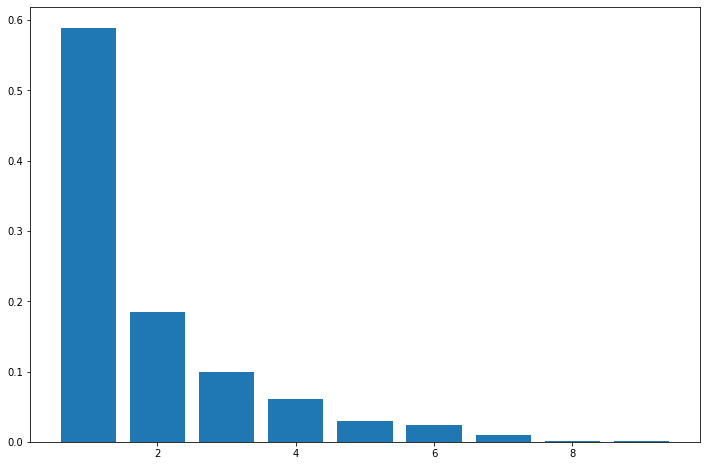

In [21]:
#Bar chart of Variance Explained by PCA
fig = plt.figure(figsize=[12,8])
plt.bar(range(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_)

In [22]:
#Cumulative Calcuation
var_cumu = np.cumsum(pca.explained_variance_ratio_)

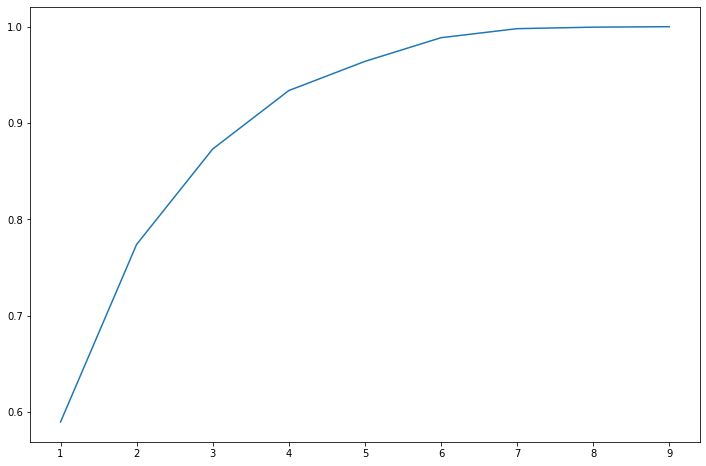

In [23]:
#Plotting the Scree Plot
fig = plt.figure(figsize=[12,8])
plt.plot(range(1,len(var_cumu)+1),var_cumu)

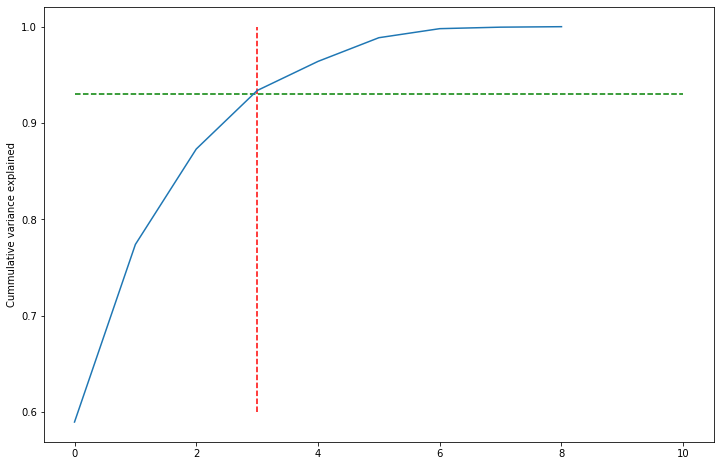

In [24]:
#Scree Plot with axis
fig = plt.figure(figsize=[12,8])
plt.plot(var_cumu)
plt.hlines(y=0.93, xmax=10, xmin=0, colors="g", linestyles="--")
plt.vlines(x=3, ymax=1, ymin=0.6, colors="r", linestyles="--")
plt.ylabel("Cummulative variance explained")
plt.show()

> ### 3.1.2. Perform PCA with 3 components

In [25]:
# dimenstionality reduction
pca_final = IncrementalPCA(n_components=3)

In [26]:
#Transforming the data
df_pca = pca_final.fit_transform(X)

In [27]:
df_pca.shape

(167, 3)

In [28]:
#Print the resulatant PCs here
df_pca[:10]

array([[-2.63744157,  1.46903797, -0.54135911],
       [-0.02227696, -1.43189586, -0.02070095],
       [-0.45762626, -0.67330094,  0.96186728],
       [-2.7245203 ,  2.17458267,  0.60668655],
       [ 0.64984852, -1.02437392, -0.25010285],
       [ 0.03719686, -0.68088909,  1.46696276],
       [-0.33269152, -1.27451685,  0.17663611],
       [ 3.18036154, -0.25078488, -0.11687726],
       [ 3.81568156,  0.2560835 , -0.27049529],
       [-0.46751515, -0.49349236,  0.60328803]])

In [29]:
#Creating a transpose so that the each column is properly arranged
pc = np.transpose(df_pca)

In [30]:
# Create a dataframe with the PCs obtained
pca_df2 = pd.DataFrame({"PC1":pc[0],'PC2':pc[1], 'PC3':pc[2]})

In [31]:
# Check the head of the resultant data
pca_df2.head()

,PC1,PC2,PC3
0,-2.637442,1.469038,-0.541359
1,-0.022277,-1.431896,-0.020701
2,-0.457626,-0.673301,0.961867
3,-2.724520,2.174583,0.606687
4,0.649849,-1.024374,-0.250103


In [32]:
#Let's add back the Country to the given principal components
pca_df2 = pd.concat([pca_df2, y], axis=1)
pca_df2.head()

,PC1,PC2,PC3,country
0,-2.637442,1.469038,-0.541359,Afghanistan
1,-0.022277,-1.431896,-0.020701,Albania
2,-0.457626,-0.673301,0.961867,Algeria
3,-2.724520,2.174583,0.606687,Angola
4,0.649849,-1.024374,-0.250103,Antigua and Barbuda


In [33]:
#check for nulls
pca_df2.isnull().any()

PC1        False
PC2        False
PC3        False
country    False
dtype: bool

> ## 3.2. Outlier Treatment

In [34]:
pca_df2.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,PC1,PC2,PC3
count,1.670000e+02,1.670000e+02,1.670000e+02
mean,2.127373e-17,1.329608e-18,2.925139e-17
std,2.310042e+00,1.292295e+00,9.467202e-01
min,-3.944960e+00,-1.696969e+00,-1.791111e+00
25%,-1.446673e+00,-9.783466e-01,-3.974440e-01
50%,-3.567044e-01,-3.984503e-01,-1.740323e-01
75%,8.505467e-01,6.782430e-01,2.604698e-01
90%,2.975462e+00,1.586252e+00,9.557187e-01
95%,3.917319e+00,2.171455e+00,1.191825e+00
99%,6.374115e+00,3.302818e+00,3.062770e+00


> ### 3.2.1. Outlier Treatment - PC1

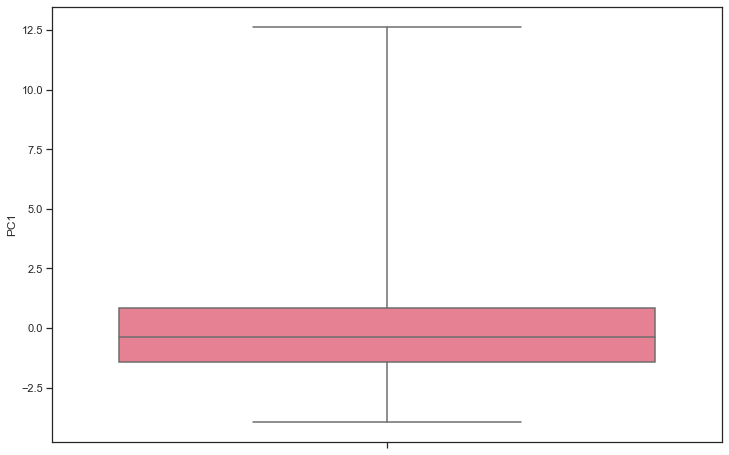

0.05 Percentile is : -2.7610101049201816, 0.90 Percentile is : 6.678328963972401, 0.95 Percentile is : 3.917318859052219
PC1 - Total Number of Records 167, after removing outliner 149, Percentage dropped 10.78%


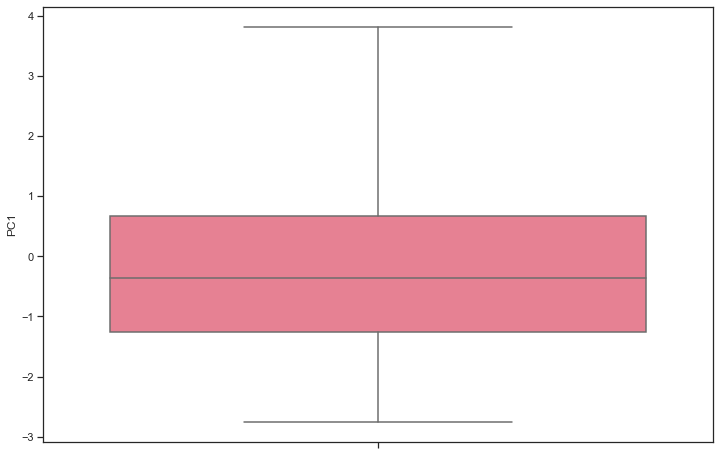

In [35]:
#BarPlot before dropping
sns.set(style="ticks")
plt.subplots(figsize=(12,8), sharex=True)
sns.boxplot(y=pca_df2['PC1'], whis="range", palette="husl")
plt.show()

# Total record count of column
totalCount = pca_df2['PC1'].count()

#outliner treatment for child_mort
Q1 = pca_df2.PC1.quantile(0.05)
Q3 = pca_df2.PC1.quantile(0.95)
IQR = Q3-Q1
print("0.05 Percentile is : {0}, 0.90 Percentile is : {1}, 0.95 Percentile is : {2}".format(Q1,IQR,Q3))
pca_df2 = pca_df2[(pca_df2.PC1 >= Q1) & (pca_df2.PC1 <= Q3)]

# Total record count after removing outliner
removeCount = pca_df2['PC1'].count()

# Dropped records Percentage Calcualtion
perCalc=0
perCalc = round(100*(1- removeCount/totalCount),2)
print("PC1 - Total Number of Records {0}, after removing outliner {1}, Percentage dropped {2}%".format(totalCount, removeCount, perCalc))

#BarPlot after dropping
sns.set(style="ticks")
plt.subplots(figsize=(12,8), sharex=True)
sns.boxplot(y=pca_df2['PC1'], whis="range", palette="husl")
plt.show()


> ### 3.2.2. Outlier Treatment - PC2

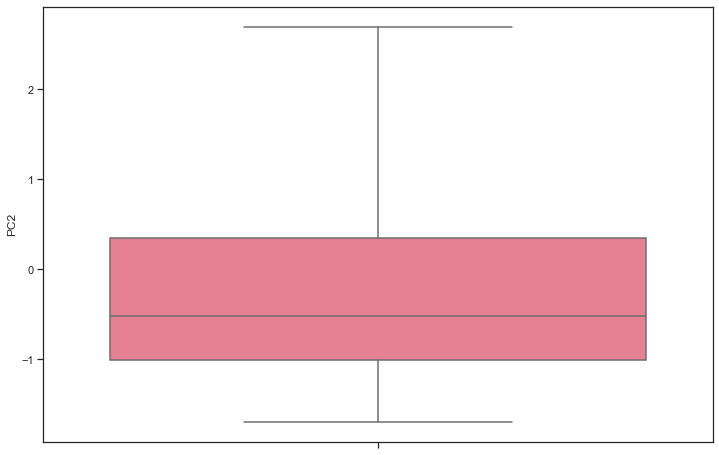

0.05 Percentile is : -1.3684306776672928, 0.90 Percentile is : 2.8524088307670876, 0.95 Percentile is : 1.483978153099795
PC2 - Total Number of Records 149, after removing outliner 133, Percentage dropped 10.74%


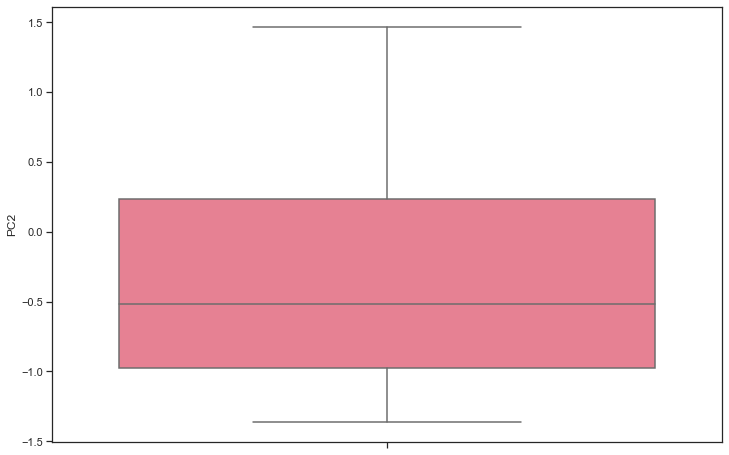

In [36]:
#BarPlot before dropping
sns.set(style="ticks")
plt.subplots(figsize=(12,8), sharex=True)
sns.boxplot(y=pca_df2['PC2'], whis="range", palette="husl")
plt.show()

# Total record count of column
totalCount = pca_df2['PC2'].count()

#outliner treatment for child_mort
Q1 = pca_df2.PC2.quantile(0.05)
Q3 = pca_df2.PC2.quantile(0.95)
IQR = Q3-Q1
print("0.05 Percentile is : {0}, 0.90 Percentile is : {1}, 0.95 Percentile is : {2}".format(Q1,IQR,Q3))
pca_df2 = pca_df2[(pca_df2.PC2 >= Q1) & (pca_df2.PC2 <= Q3)]

# Total record count after removing outliner
removeCount = pca_df2['PC2'].count()

# Dropped records Percentage Calcualtion
perCalc=0
perCalc = round(100*(1- removeCount/totalCount),2)
print("PC2 - Total Number of Records {0}, after removing outliner {1}, Percentage dropped {2}%".format(totalCount, removeCount, perCalc))

#BarPlot after dropping
sns.set(style="ticks")
plt.subplots(figsize=(12,8), sharex=True)
sns.boxplot(y=pca_df2['PC2'], whis="range", palette="husl")
plt.show()



> ### 3.2.3. Outlier Treatment - PC3

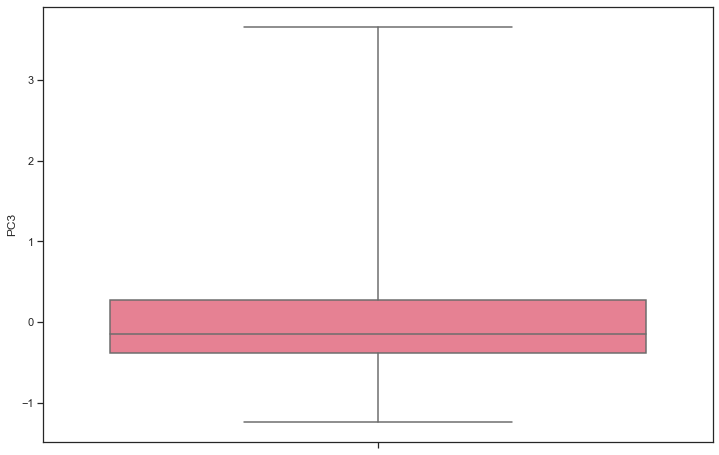

0.05 Percentile is : -0.8914343685972016, 0.90 Percentile is : 2.130859684882185, 0.95 Percentile is : 1.2394253162849833
PC3 - Total Number of Records 133, after removing outliner 119, Percentage dropped 10.53%


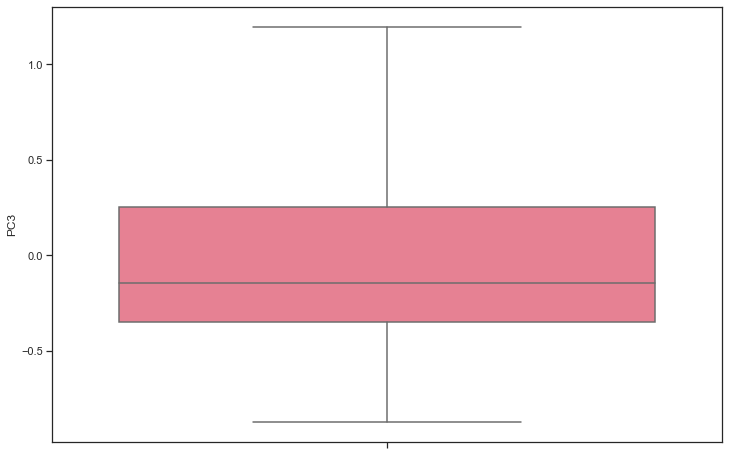

In [37]:
#BarPlot before dropping
sns.set(style="ticks")
plt.subplots(figsize=(12,8), sharex=True)
sns.boxplot(y=pca_df2['PC3'], whis="range", palette="husl")
plt.show()

# Total record count of column
totalCount = pca_df2['PC3'].count()

#outliner treatment for child_mort
Q1 = pca_df2.PC3.quantile(0.05)
Q3 = pca_df2.PC3.quantile(0.95)
IQR = Q3-Q1
print("0.05 Percentile is : {0}, 0.90 Percentile is : {1}, 0.95 Percentile is : {2}".format(Q1,IQR,Q3))
pca_df2 = pca_df2[(pca_df2.PC3 >= Q1) & (pca_df2.PC3 <= Q3)]

# Total record count after removing outliner
removeCount = pca_df2['PC3'].count()

# Dropped records Percentage Calcualtion
perCalc=0
perCalc = round(100*(1- removeCount/totalCount),2)
print("PC3 - Total Number of Records {0}, after removing outliner {1}, Percentage dropped {2}%".format(totalCount, removeCount, perCalc))

#BarPlot after dropping
sns.set(style="ticks")
plt.subplots(figsize=(12,8), sharex=True)
sns.boxplot(y=pca_df2['PC3'], whis="range", palette="husl")
plt.show()



In [38]:
pca_df2.dropna(inplace=True)
pca_df2.reset_index(drop=True, inplace=True)

In [39]:
pca_df2.head()

,PC1,PC2,PC3,country
0,-2.637442,1.469038,-0.541359,Afghanistan
1,-0.457626,-0.673301,0.961867,Algeria
2,0.649849,-1.024374,-0.250103,Antigua and Barbuda
3,-0.332692,-1.274517,0.176636,Armenia
4,3.180362,-0.250785,-0.116877,Australia


> ### 3.1.3. Plotting Data

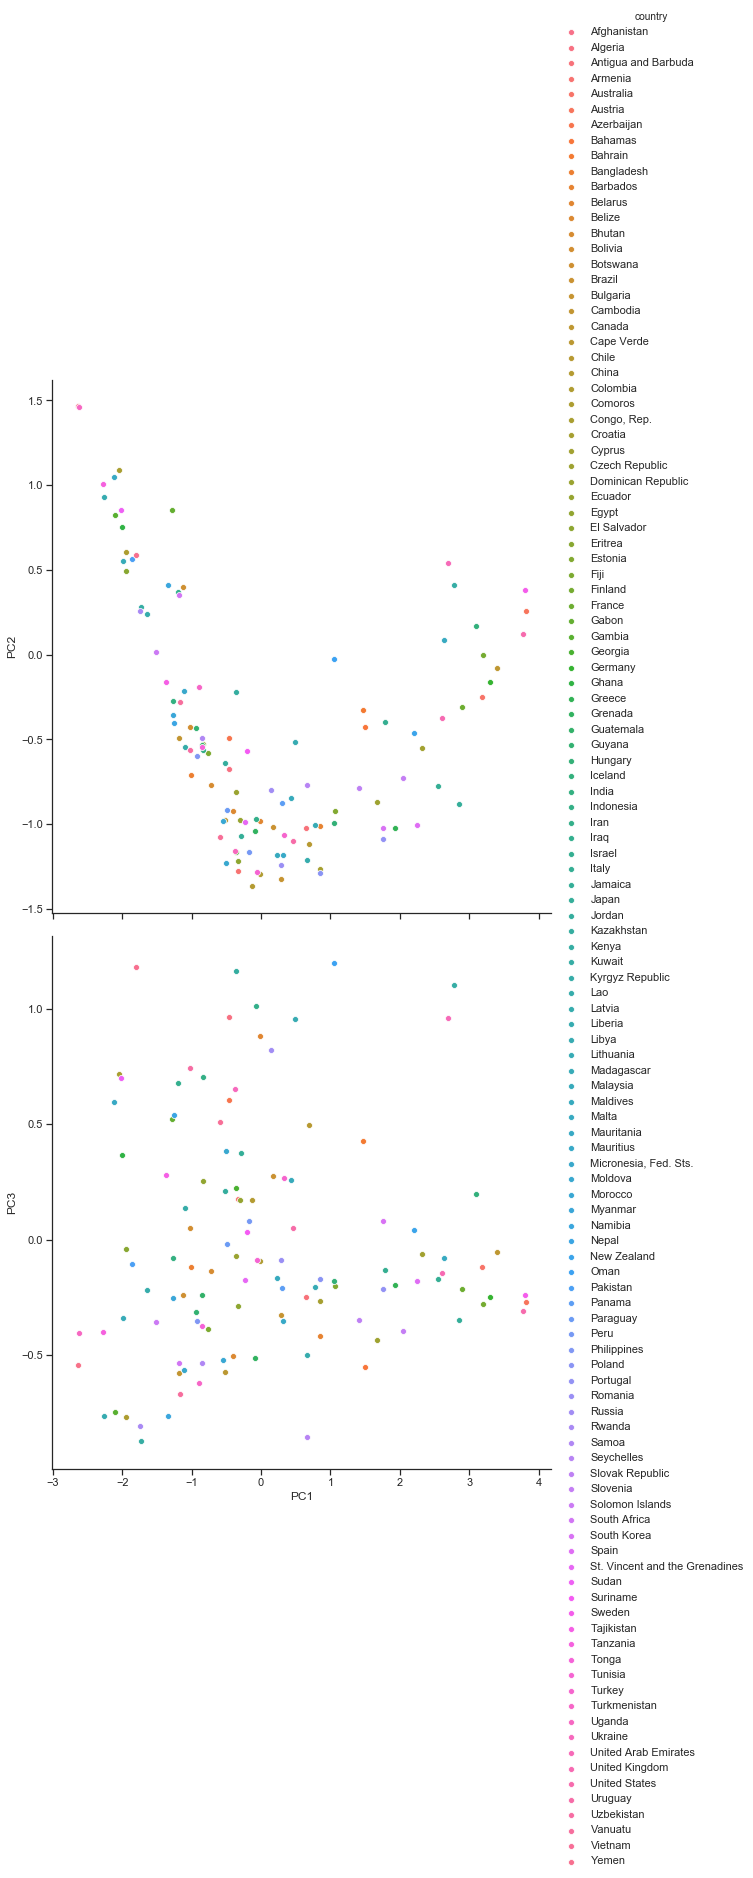

In [40]:
#Let's visualise the resultant PCs
sns.pairplot(data=pca_df2, x_vars=["PC1"], y_vars=["PC2","PC3"], hue="country", height=8)


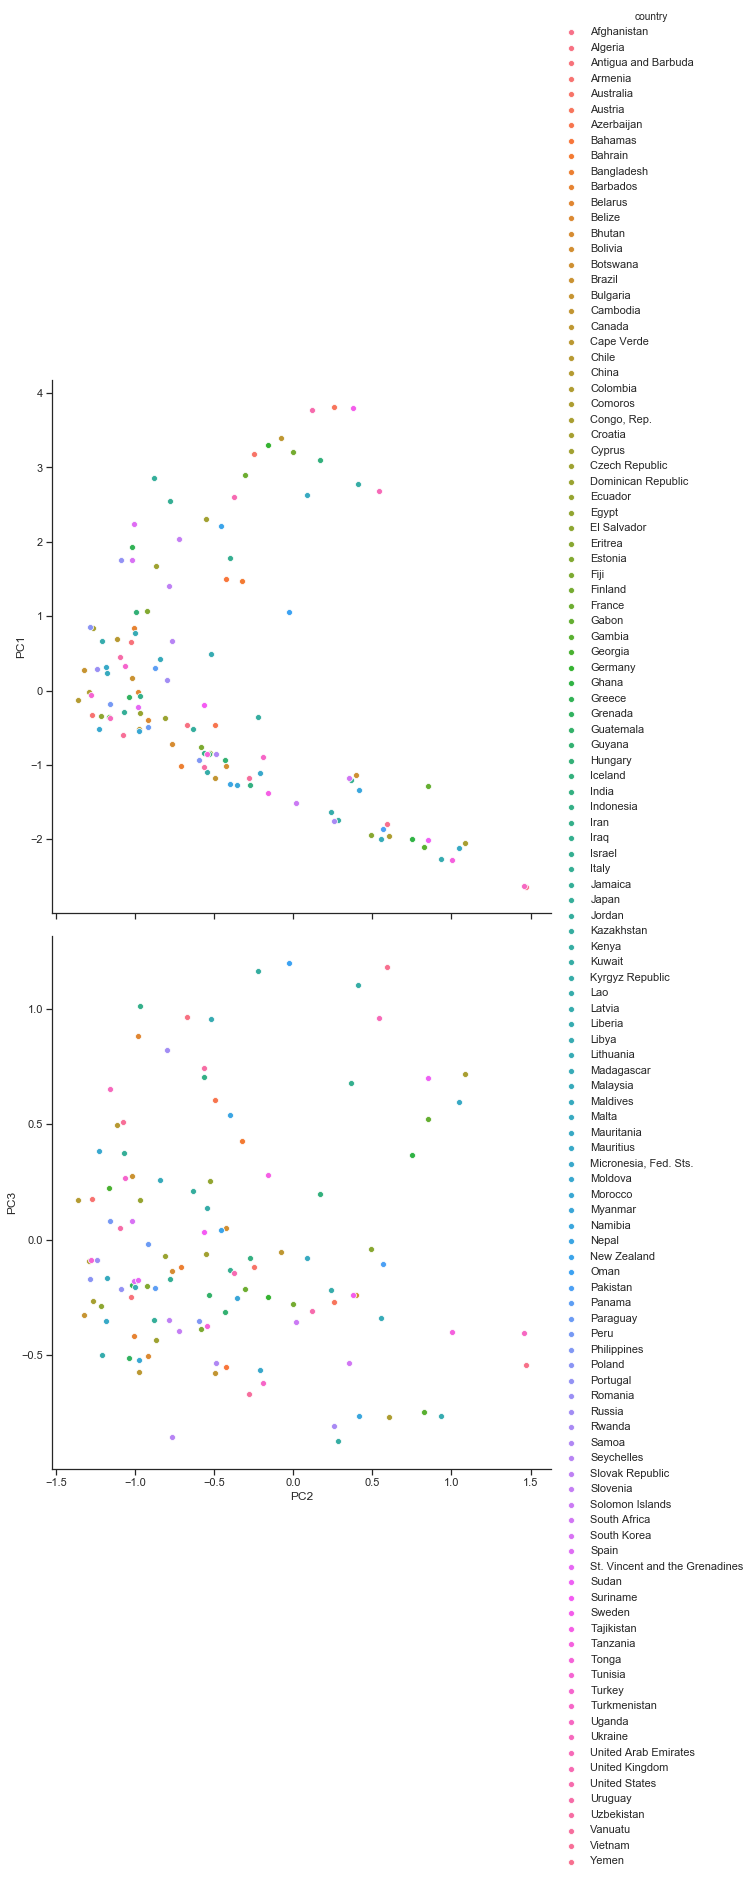

In [41]:
#Let's visualise the resultant PCs
sns.pairplot(data=pca_df2, x_vars=["PC2"], y_vars=["PC1","PC3"], hue="country", height=8)


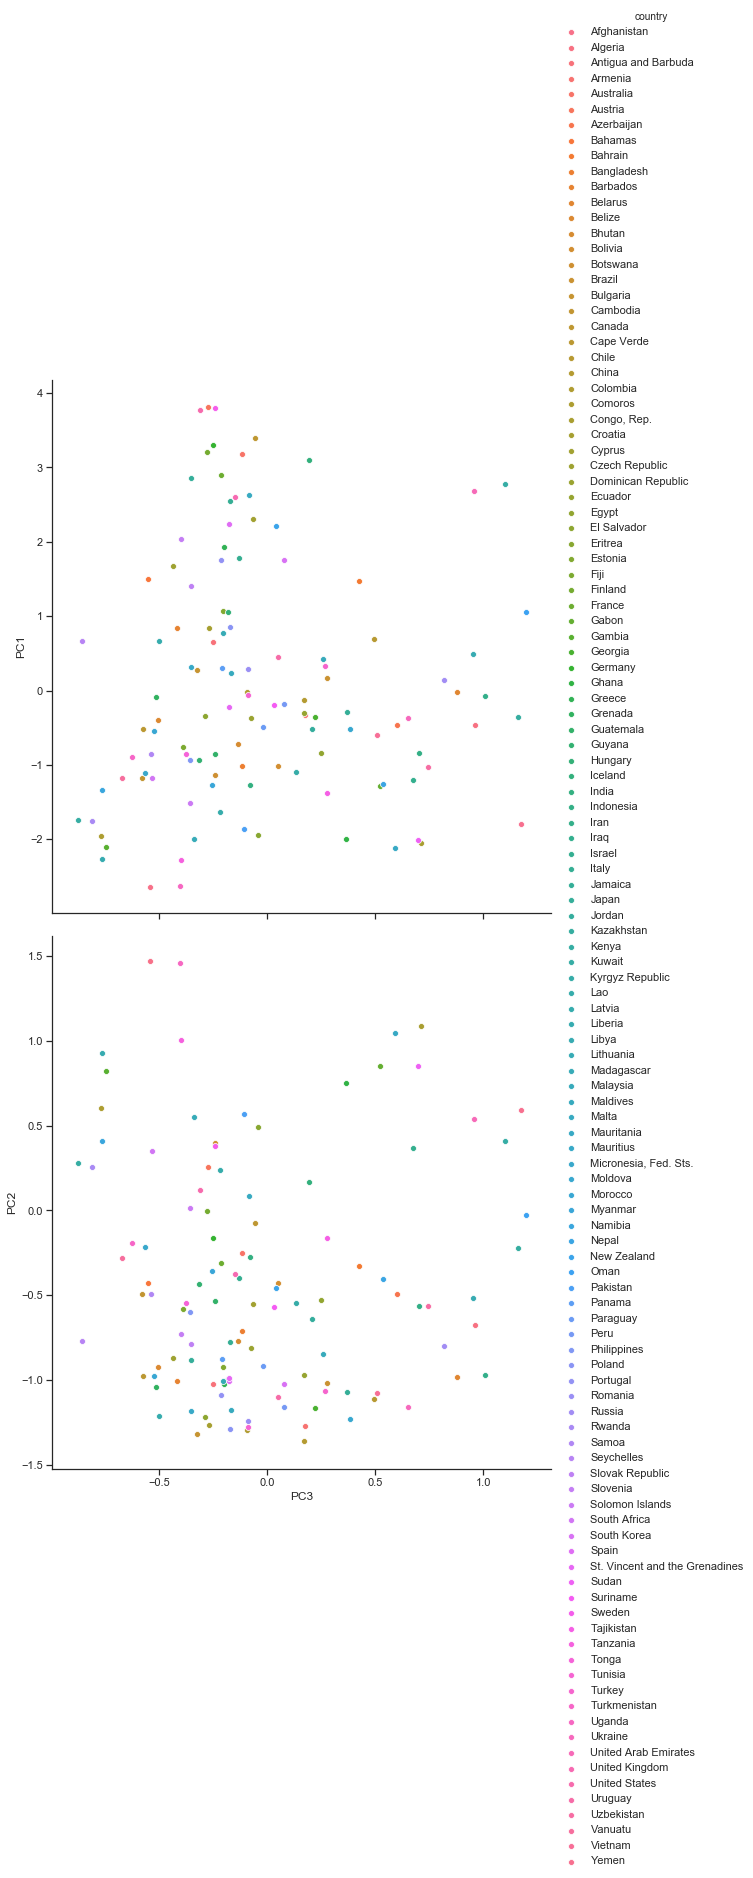

In [42]:
#Let's visualise the resultant PCs
sns.pairplot(data=pca_df2, x_vars=["PC3"], y_vars=["PC1","PC2"], hue="country", height=8)



> ## 3.3. Clustering

> ### The given data good for performing Clustering is "Good"

In [43]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [44]:
hopkins(pca_df2.drop('country',axis=1))

0.7668022265357999

In [45]:
# Now for perfroming clustering, we need to again drop the Country column, Let's drop it
dat3_1 = pca_df2.drop('country',axis=1)

In [46]:
# Check the shape of the resultant data
dat3_1.head()

,PC1,PC2,PC3
0,-2.637442,1.469038,-0.541359
1,-0.457626,-0.673301,0.961867
2,0.649849,-1.024374,-0.250103
3,-0.332692,-1.274517,0.176636
4,3.180362,-0.250785,-0.116877


> ## 3.4. K-Means Clustering

> ### 3.4.1. Silhouette Analysis

> #### for n_cluster=2, the Silhouette score is 0.4873400103541441

In [47]:
#Silhouette score Analysis

range_n_clusters = [2,3,4,5,6,7,8,9]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(dat3_1)
    cluster_labels = kmeans.labels_
    
    #silhouette score
    silhouette_avg = silhouette_score(dat3_1,cluster_labels)
    print("for n_cluster={0}, the Silhouette score is {1}".format(num_clusters,silhouette_avg))
    

for n_cluster=2, the Silhouette score is 0.4873400103541441
for n_cluster=3, the Silhouette score is 0.4639771456218248
for n_cluster=4, the Silhouette score is 0.3987356568367148
for n_cluster=5, the Silhouette score is 0.3657797409565338
for n_cluster=6, the Silhouette score is 0.3601947788006892
for n_cluster=7, the Silhouette score is 0.36547334471344944
for n_cluster=8, the Silhouette score is 0.3734005556706244
for n_cluster=9, the Silhouette score is 0.38058595617221236


> ### 3.4.2. SSD / Elbow curve

> #### SSD Shows optimal number of clusters is 3

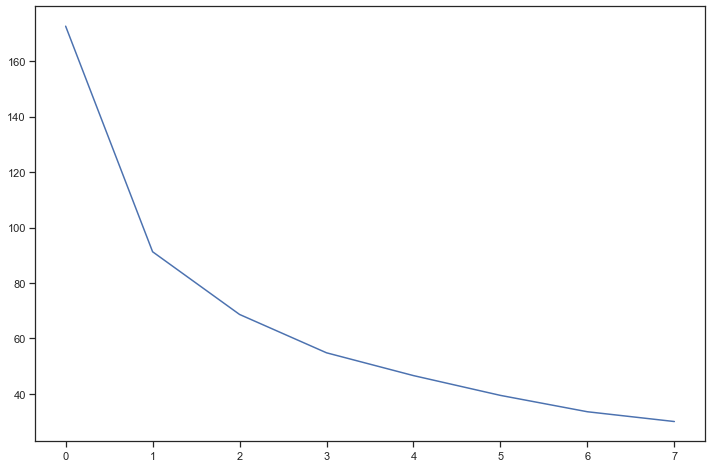

In [48]:
#elbow curve/SSD

ssd = []
range_n_clusters = [2,3,4,5,6,7,8,9]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(dat3_1)
    ssd.append(kmeans.inertia_)

# plot the SSDs for each n_clusters
# ssd
plt.subplots(figsize=(12,8), sharex=True)
plt.plot(ssd)
plt.show()

> ### 3.4.3. KMeans with the K  

In [49]:
#Kmeans using K
model_clus2 = KMeans(n_clusters=3, max_iter=50, random_state=50)
model_clus2.fit(dat3_1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [50]:
# Let's add the cluster Ids to the PCs data 
dat_km = pd.concat([pca_df2.reset_index().drop('index',axis=1), pd.Series(model_clus2.labels_)],axis=1)
dat_km.columns = ['PC1','PC2','PC3','country','KClusterID']
dat_km.head()

,PC1,PC2,PC3,country,KClusterID
0,-2.637442,1.469038,-0.541359,Afghanistan,2
1,-0.457626,-0.673301,0.961867,Algeria,1
2,0.649849,-1.024374,-0.250103,Antigua and Barbuda,1
3,-0.332692,-1.274517,0.176636,Armenia,1
4,3.180362,-0.250785,-0.116877,Australia,0


In [51]:
# Check the count of observation per cluster
dat_km['KClusterID'].value_counts()


1    61
2    31
0    27
Name: KClusterID, dtype: int64

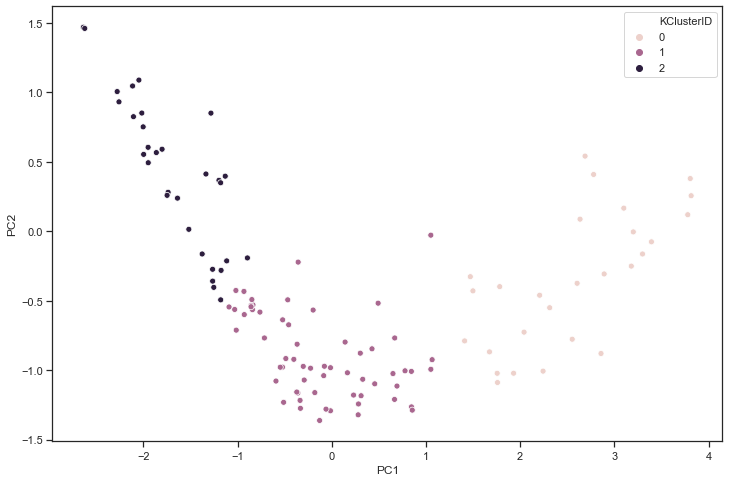

In [52]:
# Plot the Cluster with respect to the clusters obtained
plt.subplots(figsize=(12,8), sharex=True)
sns.scatterplot(x='PC1', y='PC2', hue='KClusterID', legend='full', data=dat_km)
plt.show()

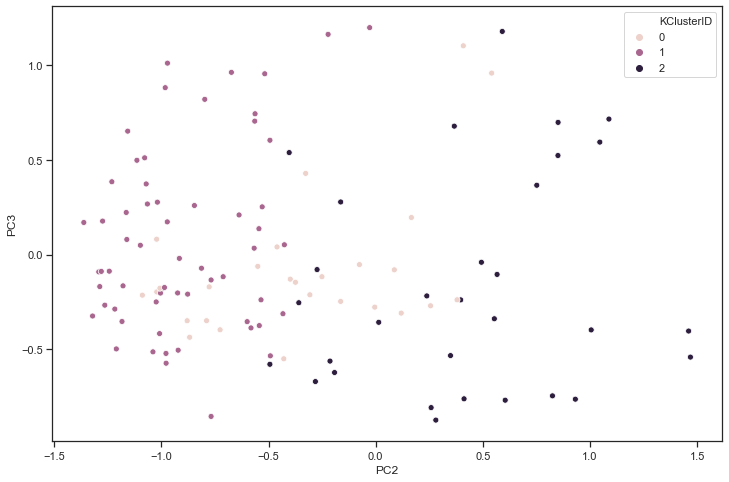

In [53]:
# Plot the Cluster with respect to the clusters obtained
plt.subplots(figsize=(12,8), sharex=True)
sns.scatterplot(x='PC2', y='PC3', hue='KClusterID', legend='full', data=dat_km)
plt.show()

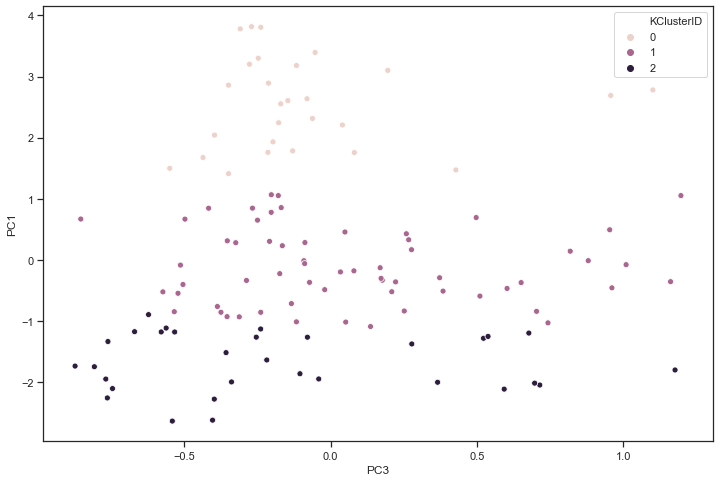

In [54]:
# Plot the Cluster with respect to the clusters obtained
plt.subplots(figsize=(12,8), sharex=True)
sns.scatterplot(x='PC3', y='PC1', hue='KClusterID', legend='full', data=dat_km)
plt.show()

> ### 3.4.4. Cluster Profiling

In [55]:
# Let's merge the original data with the data(ClusterID)
dat5 = pd.merge(dfCountry,dat_km, how='inner', on='country')
dat5.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,KClusterID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,-2.637442,1.469038,-0.541359,2
1,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,-0.457626,-0.673301,0.961867,1
2,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0.649849,-1.024374,-0.250103,1
3,Armenia,18.1,669.76,141.6800,1458.660,6700,7.77,73.3,1.69,3220,-0.332692,-1.274517,0.176636,1
4,Australia,4.8,10276.20,4530.8700,10847.100,41400,1.16,82.0,1.93,51900,3.180362,-0.250785,-0.116877,0


In [56]:
# Let's drop PCs from the data
dat5.drop(['PC1','PC2','PC3'],axis=1, inplace=True)
dat5.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KClusterID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,2
1,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1
2,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,1
3,Armenia,18.1,669.76,141.6800,1458.660,6700,7.77,73.3,1.69,3220,1
4,Australia,4.8,10276.20,4530.8700,10847.100,41400,1.16,82.0,1.93,51900,0


> ### 3.4.5. BoxPlot on Cluster Profiled DataSet

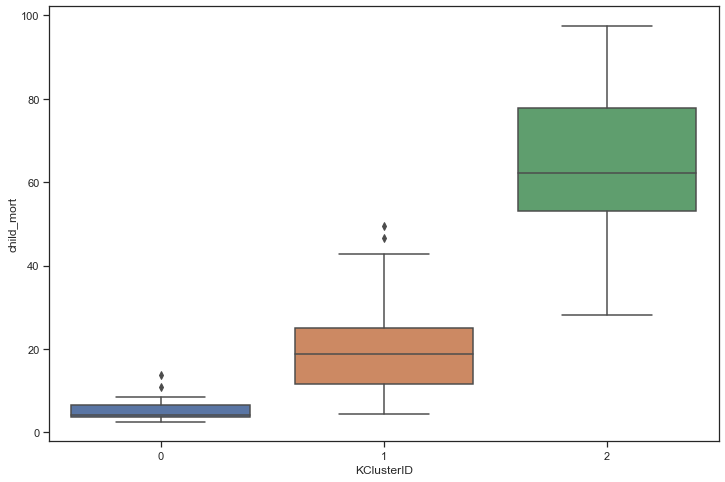

In [57]:
# Plot the Cluster with respect to the Child_mort

plt.subplots(figsize=(12,8), sharex=True)
sns.boxplot(x="KClusterID", y="child_mort",data=dat5)
plt.show()


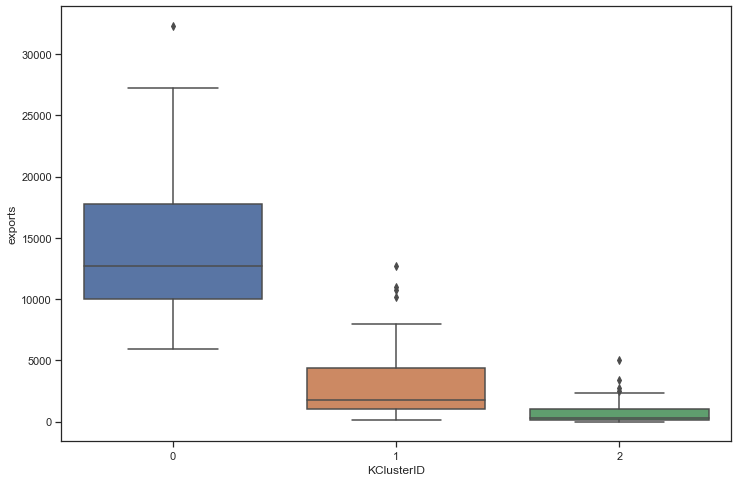

In [58]:
# Plot the Cluster with respect to the exports

plt.subplots(figsize=(12,8), sharex=True)
sns.boxplot(x="KClusterID", y="exports",data=dat5)
plt.show()


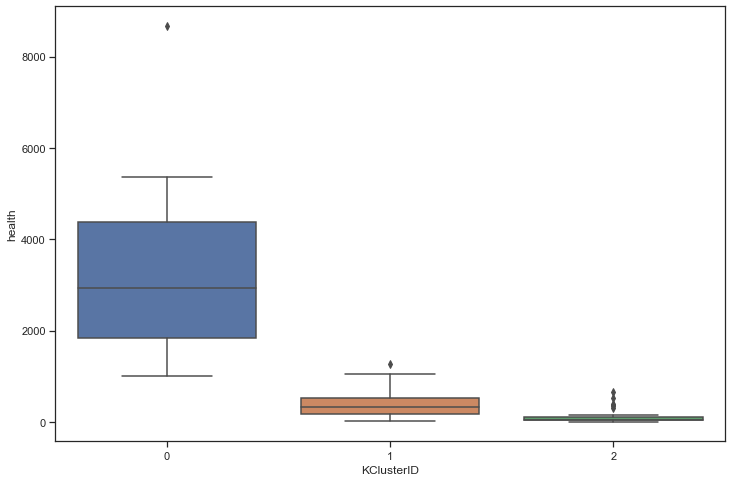

In [59]:
# Plot the Cluster with respect to the health

plt.subplots(figsize=(12,8), sharex=True)
sns.boxplot(x="KClusterID", y="health",data=dat5)
plt.show()


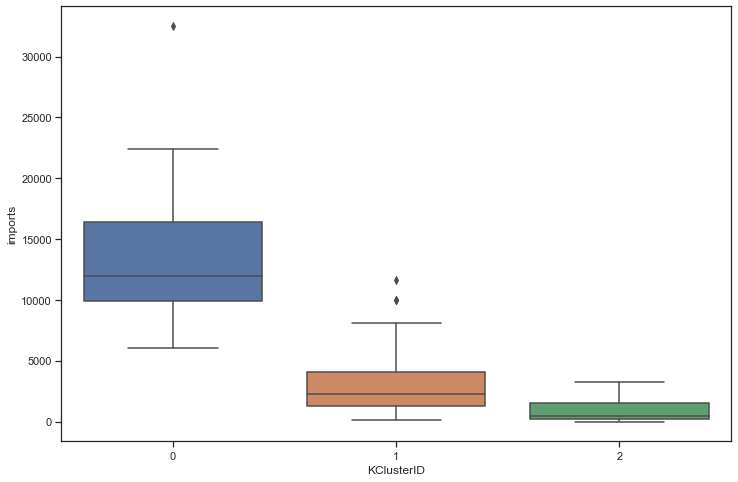

In [60]:
# Plot the Cluster with respect to the imports

plt.subplots(figsize=(12,8), sharex=True)
sns.boxplot(x="KClusterID", y="imports",data=dat5)
plt.show()


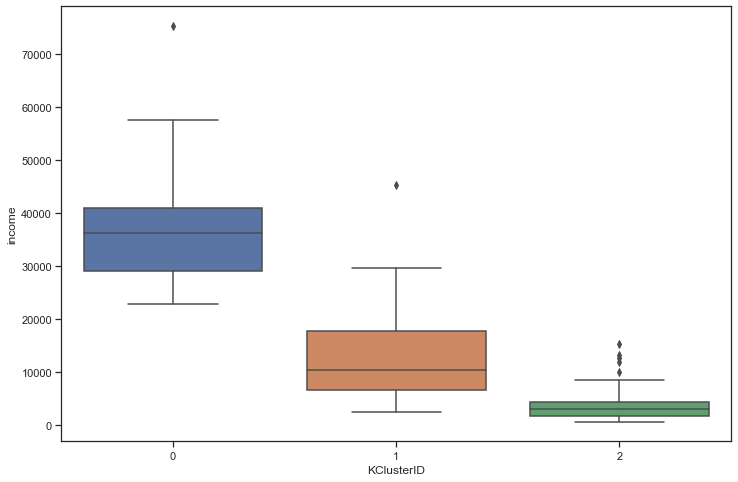

In [61]:
# Plot the Cluster with respect to the income

plt.subplots(figsize=(12,8), sharex=True)
sns.boxplot(x="KClusterID", y="income",data=dat5)
plt.show()


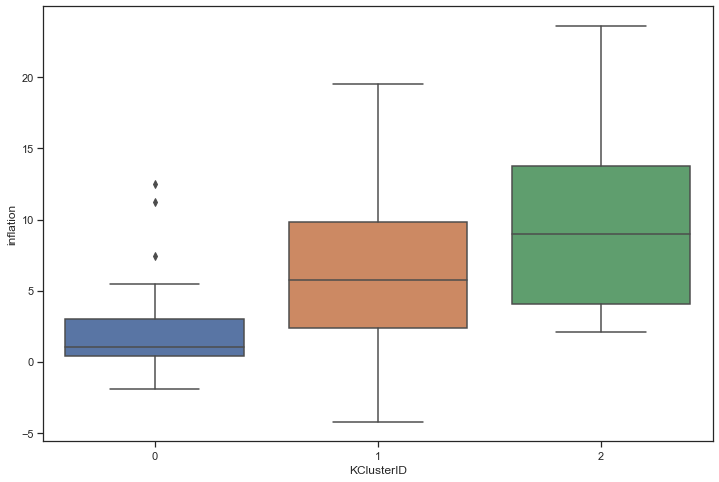

In [62]:
# Plot the Cluster with respect to the inflation

plt.subplots(figsize=(12,8), sharex=True)
sns.boxplot(x="KClusterID", y="inflation",data=dat5)
plt.show()


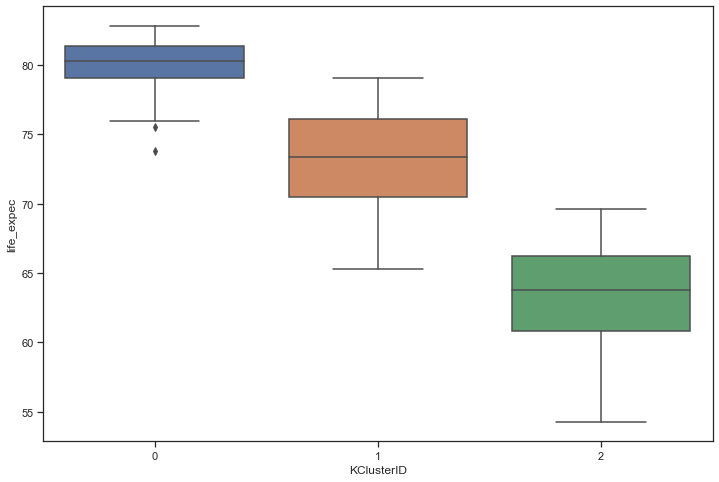

In [63]:
# Plot the Cluster with respect to the life_expec

plt.subplots(figsize=(12,8), sharex=True)
sns.boxplot(x="KClusterID", y="life_expec",data=dat5)
plt.show()


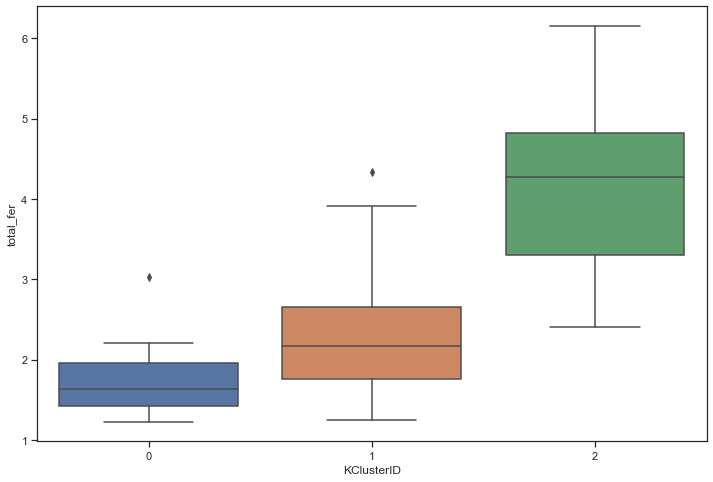

In [64]:
# Plot the Cluster with respect to the total_fer

plt.subplots(figsize=(12,8), sharex=True)
sns.boxplot(x="KClusterID", y="total_fer",data=dat5)
plt.show()


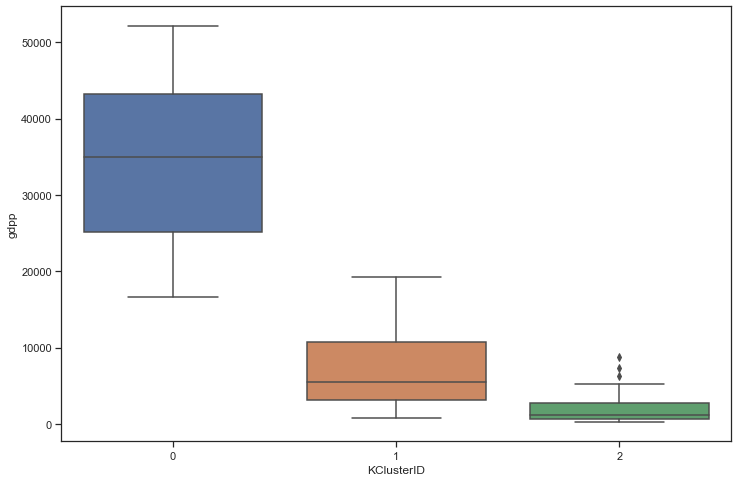

In [65]:
# Plot the Cluster with respect to the gdpp

plt.subplots(figsize=(12,8), sharex=True)
sns.boxplot(x="KClusterID", y="gdpp",data=dat5)
plt.show()


> ## 3.3 Hierarchical Clustering

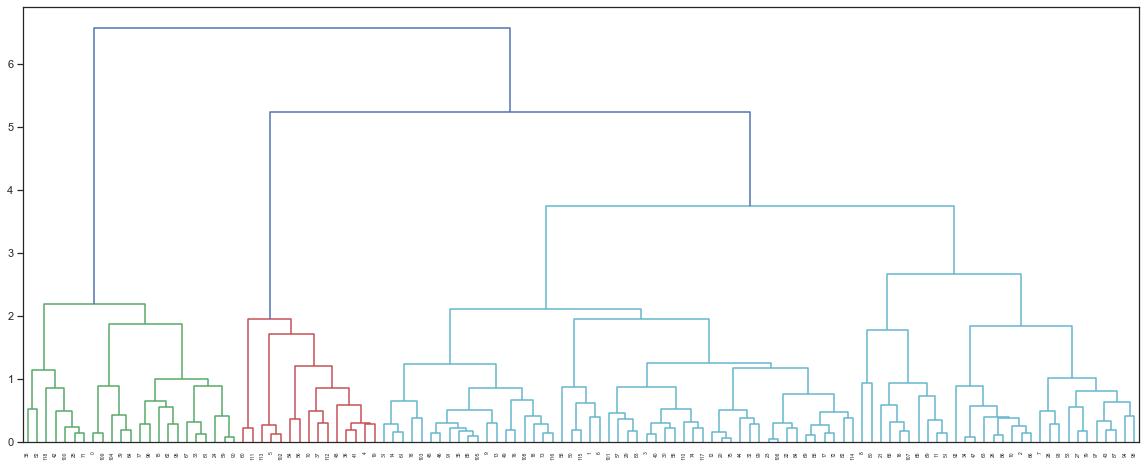

In [66]:
#Complete Linkage 
plt.subplots(figsize=(20,8), sharex=True)
mergings = linkage(dat3_1, method="complete", metric="euclidean")
dendrogram(mergings)
plt.show()

In [67]:
# 4 clusters
cluster_labels = cut_tree(mergings,n_clusters=3).reshape(-1,)
cluster_labels

array([0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 2, 1, 2, 1, 1, 0, 2, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 2, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 2, 1, 0, 1, 1, 1, 1, 0,
       1, 2, 2, 2, 1, 1, 1, 1, 0])

In [68]:
dat5['HCluster_id'] = cluster_labels
dat5.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KClusterID,HCluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,2,0
1,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1,1
2,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,1,1
3,Armenia,18.1,669.76,141.6800,1458.660,6700,7.77,73.3,1.69,3220,1,1
4,Australia,4.8,10276.20,4530.8700,10847.100,41400,1.16,82.0,1.93,51900,0,2


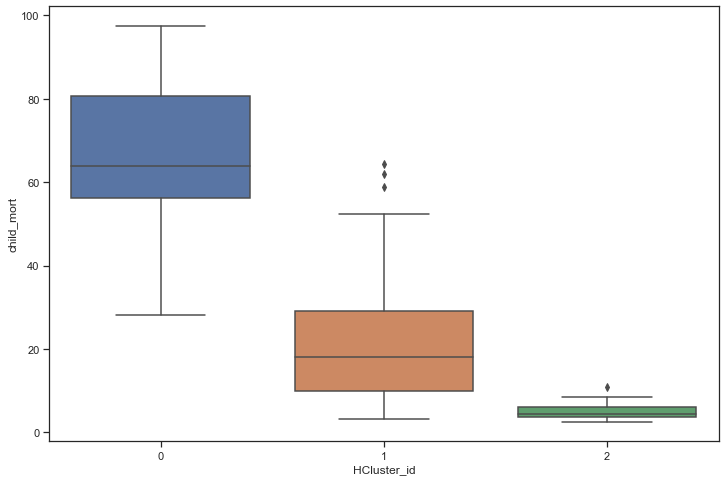

In [69]:
# Plot the Cluster with respect to the child_mort
plt.subplots(figsize=(12,8), sharex=True)
sns.boxplot(x="HCluster_id", y="child_mort",data=dat5)
plt.show()


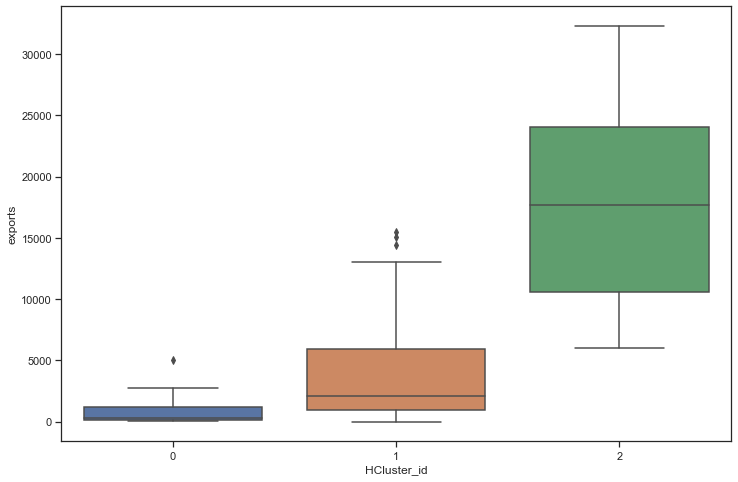

In [70]:
# Plot the Cluster with respect to the exports
plt.subplots(figsize=(12,8), sharex=True)
sns.boxplot(x="HCluster_id", y="exports",data=dat5)
plt.show()


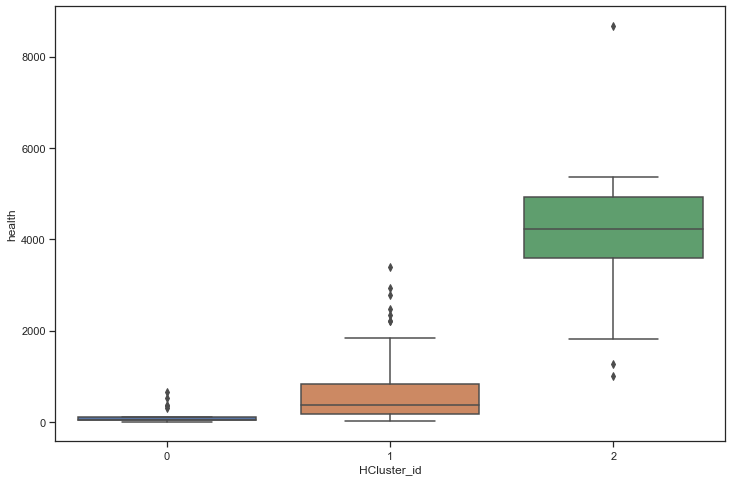

In [71]:
# Plot the Cluster with respect to the health
plt.subplots(figsize=(12,8), sharex=True)
sns.boxplot(x="HCluster_id", y="health",data=dat5)
plt.show()


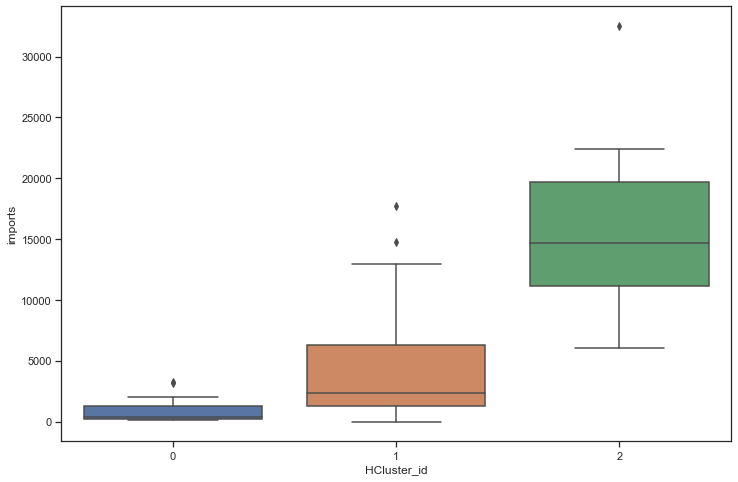

In [72]:
# Plot the Cluster with respect to the imports
plt.subplots(figsize=(12,8), sharex=True)
sns.boxplot(x="HCluster_id", y="imports",data=dat5)
plt.show()


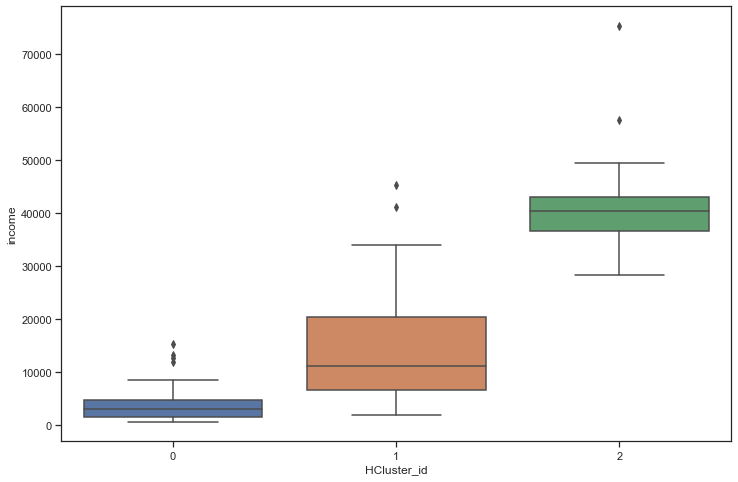

In [73]:

# Plot the Cluster with respect to the income
plt.subplots(figsize=(12,8), sharex=True)
sns.boxplot(x="HCluster_id", y="income",data=dat5)
plt.show()


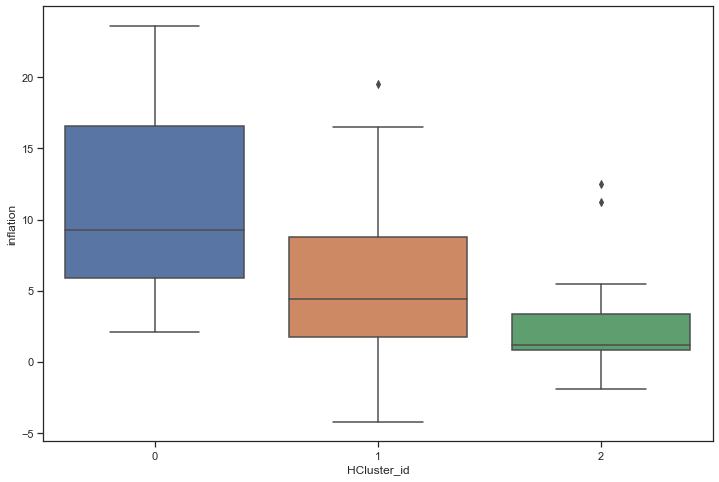

In [74]:

# Plot the Cluster with respect to the inflation
plt.subplots(figsize=(12,8), sharex=True)
sns.boxplot(x="HCluster_id", y="inflation",data=dat5)
plt.show()


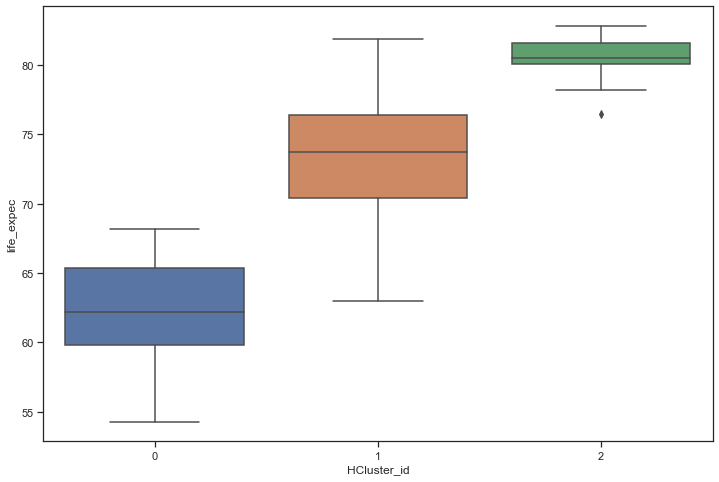

In [75]:

# Plot the Cluster with respect to the life_expec
plt.subplots(figsize=(12,8), sharex=True)
sns.boxplot(x="HCluster_id", y="life_expec",data=dat5)
plt.show()


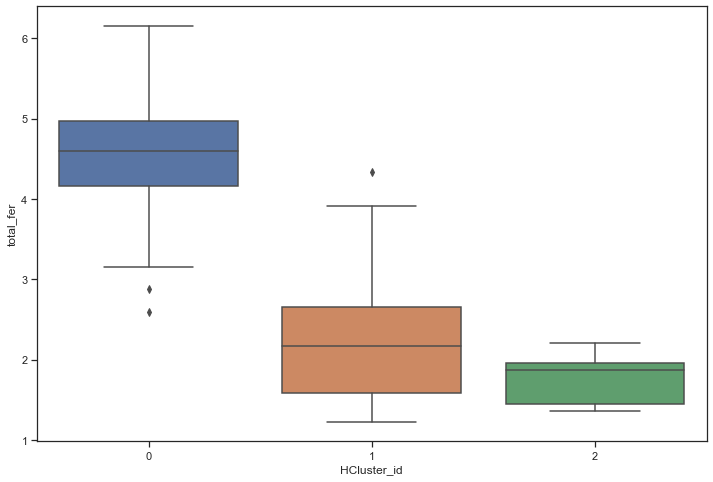

In [76]:

# Plot the Cluster with respect to the total_fer
plt.subplots(figsize=(12,8), sharex=True)
sns.boxplot(x="HCluster_id", y="total_fer",data=dat5)
plt.show()


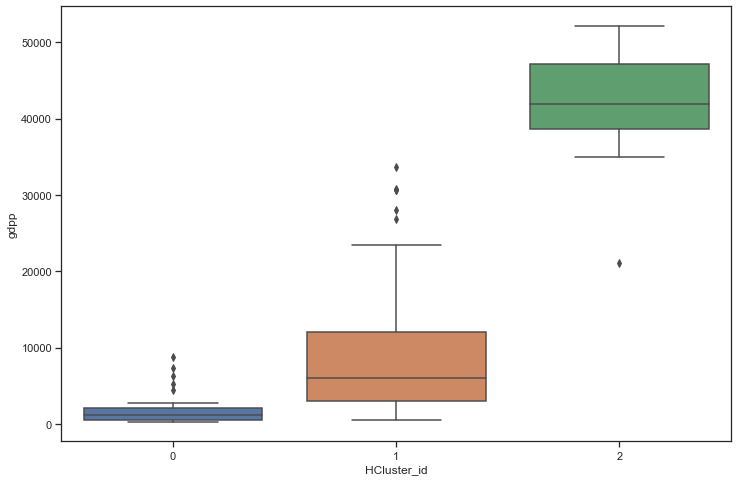

In [77]:

# Plot the Cluster with respect to the gdpp
plt.subplots(figsize=(12,8), sharex=True)
sns.boxplot(x="HCluster_id", y="gdpp",data=dat5)
plt.show()


In [78]:
dat5.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KClusterID,HCluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,2,0
1,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1,1
2,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,1,1
3,Armenia,18.1,669.76,141.6800,1458.660,6700,7.77,73.3,1.69,3220,1,1
4,Australia,4.8,10276.20,4530.8700,10847.100,41400,1.16,82.0,1.93,51900,0,2


> ## 3.4. Analysis of the Clustering

> ### 3.4.1. Analysis of the KMean Clustering

In [79]:
# Let's profile the cluster by taking the mean of various attributes
child_mort = dat5.groupby(['KClusterID']).child_mort.mean()
exports = dat5.groupby(['KClusterID']).exports.mean()
health = dat5.groupby(['KClusterID']).health.mean()
imports = dat5.groupby(['KClusterID']).imports.mean()
income = dat5.groupby(['KClusterID']).income.mean()
inflation = dat5.groupby(['KClusterID']).inflation.mean()
life_expec = dat5.groupby(['KClusterID']).life_expec.mean()
total_fer = dat5.groupby(['KClusterID']).total_fer.mean()
gdpp = dat5.groupby(['KClusterID']).gdpp.mean()

In [80]:
# Let's concat the resultant with the Cluster ID columns
df_Kmean = pd.concat([child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp], axis=1)

In [81]:
df_Kmean

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
KClusterID,,,,,,,,,
0,5.322222,14504.025926,3249.133704,13650.455556,37170.370370,2.204556,79.777778,1.749259,34696.296296
1,20.221311,3071.619836,406.979256,3160.474656,12796.557377,6.627721,73.208197,2.272295,6636.360656
2,63.651613,861.023623,128.778690,858.977519,4450.000000,9.736452,63.329032,4.111935,2072.161290


> ### 3.4.2. Analysis of the Hierarchical Clustering

In [82]:
# Let's profile the cluster by taking the mean of various attributes
child_mort = dat5.groupby(['HCluster_id']).child_mort.mean()
exports = dat5.groupby(['HCluster_id']).exports.mean()
health = dat5.groupby(['HCluster_id']).health.mean()
imports = dat5.groupby(['HCluster_id']).imports.mean()
income = dat5.groupby(['HCluster_id']).income.mean()
inflation = dat5.groupby(['HCluster_id']).inflation.mean()
life_expec = dat5.groupby(['HCluster_id']).life_expec.mean()
total_fer = dat5.groupby(['HCluster_id']).total_fer.mean()
gdpp = dat5.groupby(['HCluster_id']).gdpp.mean()

In [83]:
# Let's concat the resultant with the Cluster ID columns
df_Hier = pd.concat([child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp], axis=1)

In [84]:
df_Hier

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
HCluster_id,,,,,,,,,
0,68.478261,884.774513,135.873852,838.634174,4650.869565,10.711304,62.169565,4.507391,2152.739130
1,20.960494,4030.595414,635.004141,4139.667544,14473.703704,5.889160,73.403704,2.259630,8954.839506
2,5.173333,17256.080000,4132.270000,15558.526667,42853.333333,2.817467,80.486667,1.774000,42066.666667


> # <font color=blue> 4. Finding the observations that belong to certain cluster </font>

> ### The CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 

> ### Data Analysis perfomed using KMeans and Hierarchical Clustering shows that the countries that re in direst need of aid are listed below, by taking into the consideration of Variables:
- child_mort : Dath of childern under 5 is more
- exports : Less % of goods and service
- health : Less % of spedning
- imports: Less % of imports
- income : Less % of Income
- life_expec : Less average number of uears a new born would live
- gdpp : Less gdpp growth

In [85]:
df = pd.merge(dat5[dat5["KClusterID"]==2]['country'], dat5[dat5["HCluster_id"]==0]['country'], how='inner', on='country')

In [86]:
df

,country
0,Afghanistan
1,Botswana
2,Comoros
3,"Congo, Rep."
4,Eritrea
5,Gabon
6,Gambia
7,Ghana
8,Iraq
9,Kenya
